# Neil Sano 991541147

# Red Wine Alcohol Levels

In [ ]:
#If you are using Google Colab, run this command
#!pip install pycaret

In [69]:
import pandas as pd
import numpy as np
import sklearn as sk

wineData = pd.read_csv("winequality-red.csv", sep= ";")

print(wineData.shape)

wineData




(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [70]:
dataSample = wineData.sample(frac=0.9, random_state = 786)
data_unseen = wineData.drop(dataSample.index)

dataSample.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print("Data for Modeling: " + str(dataSample.shape))
print("Unseen Data for Predictions: " + str(data_unseen.shape))


Data for Modeling: (1439, 12)
Unseen Data for Predictions: (160, 12)


In [71]:
from pycaret.regression import *

wine_regression = setup(data=dataSample, target = 'alcohol', session_id=1)

,Description,Value
0,session_id,1
1,Target,alcohol
2,Original Data,"(1439, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1007, 16)"


In [72]:
best = compare_models(exclude = ['ransac'], sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3622,0.2726,0.5191,0.7546,0.0443,0.0344,0.3460
lightgbm,Light Gradient Boosting Machine,0.3655,0.2758,0.5220,0.7515,0.0448,0.0349,0.0430
xgboost,Extreme Gradient Boosting,0.3684,0.3055,0.5488,0.7241,0.0469,0.0350,0.0440
rf,Random Forest Regressor,0.3964,0.3066,0.5512,0.7222,0.0472,0.0378,0.0430
gbr,Gradient Boosting Regressor,0.4100,0.3084,0.5525,0.7211,0.0472,0.0391,0.0160
et,Extra Trees Regressor,0.3796,0.3104,0.5554,0.7180,0.0475,0.0361,0.0320
lr,Linear Regression,0.4678,0.3701,0.6057,0.6608,0.0523,0.0447,0.0030
lar,Least Angle Regression,0.4930,0.4278,0.6517,0.6091,0.0566,0.0473,0.0020
ada,AdaBoost Regressor,0.5427,0.4587,0.6762,0.5830,0.0582,0.0522,0.0120
dt,Decision Tree Regressor,0.5159,0.6193,0.7829,0.4342,0.0672,0.0493,0.0030


Top 3 models are Catboost Regressor, Light Gradient Boosting Machine, Extreme Gradient Boosting.

In [73]:
#Create a CatBoost Regressor as it currently has the lowest RMSE Score out of all the regression models
cat = create_model('catboost')

print(cat)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3470,0.2360,0.4858,0.7951,0.0417,0.0333
1,0.3559,0.3756,0.6129,0.6887,0.0488,0.0322
2,0.3691,0.2490,0.4990,0.7788,0.0425,0.0348
3,0.3697,0.2591,0.5090,0.7721,0.0427,0.0347
4,0.3691,0.2643,0.5141,0.7673,0.0445,0.0354
5,0.4194,0.3782,0.6150,0.7051,0.0531,0.0399
6,0.3699,0.2295,0.4790,0.7228,0.0422,0.0363
7,0.3723,0.3220,0.5675,0.7569,0.0485,0.0353
8,0.3430,0.2060,0.4539,0.7720,0.0395,0.0332
9,0.3070,0.2067,0.4546,0.7867,0.0393,0.0293


In [74]:
# Create a LGBM model as it was the second lowest.
lgbm = create_model('lightgbm')

print(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3640,0.2409,0.4908,0.7909,0.0425,0.0350
1,0.3697,0.3563,0.5969,0.7048,0.0479,0.0337
2,0.3437,0.2510,0.5010,0.7770,0.0431,0.0326
3,0.3571,0.2294,0.4790,0.7982,0.0414,0.0340
4,0.3629,0.2850,0.5338,0.7491,0.0464,0.0349
5,0.4156,0.3507,0.5922,0.7265,0.0512,0.0396
6,0.3803,0.2510,0.5010,0.6969,0.0440,0.0374
7,0.4263,0.3762,0.6134,0.7160,0.0525,0.0404
8,0.3177,0.1877,0.4332,0.7923,0.0383,0.0309
9,0.3179,0.2294,0.4790,0.7632,0.0411,0.0304


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [75]:
# Create an extreme gradient boosting model
xgb = create_model("xgboost")

print(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3632,0.2642,0.5140,0.7707,0.0444,0.0350
1,0.4003,0.4718,0.6869,0.6090,0.0553,0.0361
2,0.3796,0.2876,0.5363,0.7445,0.0459,0.0357
3,0.3544,0.2619,0.5117,0.7697,0.0432,0.0332
4,0.3669,0.2973,0.5452,0.7383,0.0469,0.0351
5,0.4148,0.3923,0.6264,0.6941,0.0541,0.0396
6,0.4188,0.2941,0.5423,0.6448,0.0476,0.0410
7,0.3560,0.3484,0.5903,0.7370,0.0507,0.0337
8,0.3292,0.2178,0.4667,0.7589,0.0411,0.0320
9,0.3007,0.2193,0.4683,0.7736,0.0402,0.0284


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)


# Tune the Models

In [76]:
tuned_cat = tune_model(cat, optimize='RMSE')
print(tuned_cat.get_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3578,0.2469,0.4969,0.7857,0.0423,0.0341
1,0.4202,0.4588,0.6773,0.6198,0.0541,0.0379
2,0.3876,0.2550,0.5050,0.7735,0.0432,0.0367
3,0.3878,0.2888,0.5374,0.7460,0.0452,0.0363
4,0.3804,0.2837,0.5326,0.7502,0.0461,0.0364
5,0.4586,0.4172,0.6459,0.6747,0.0553,0.0433
6,0.4069,0.2436,0.4936,0.7057,0.0434,0.0397
7,0.4181,0.3567,0.5972,0.7308,0.0509,0.0395
8,0.3570,0.2181,0.4670,0.7586,0.0410,0.0348
9,0.3169,0.2146,0.4633,0.7785,0.0398,0.0302


<bound method CatBoost.get_params of <catboost.core.CatBoostRegressor object at 0x000001DD8D0C6D00>>


In [77]:
tuned_lgbm = tune_model(lgbm, optimize='RMSE')

print(tuned_lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4367,0.3311,0.5754,0.7126,0.0492,0.0416
1,0.4762,0.5047,0.7104,0.5818,0.0575,0.0434
2,0.4121,0.2900,0.5386,0.7424,0.0459,0.0390
3,0.4219,0.3091,0.5560,0.7281,0.0474,0.0400
4,0.4211,0.3434,0.5860,0.6976,0.0506,0.0402
5,0.4936,0.4390,0.6626,0.6577,0.0564,0.0465
6,0.4658,0.3248,0.5699,0.6077,0.0496,0.0455
7,0.5067,0.4369,0.6610,0.6702,0.0567,0.0481
8,0.4197,0.2874,0.5361,0.6819,0.0473,0.0411
9,0.3955,0.3113,0.5580,0.6786,0.0479,0.0377


LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
              n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
              random_state=1, reg_alpha=0.005, reg_lambda=4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [78]:
tuned_xgb = tune_model(xgb, optimize='RMSE')

print(tuned_xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4187,0.3544,0.5953,0.6924,0.0511,0.0400
1,0.4395,0.4386,0.6623,0.6366,0.0540,0.0405
2,0.4488,0.3556,0.5963,0.6842,0.0511,0.0426
3,0.4394,0.3592,0.5993,0.6841,0.0509,0.0416
4,0.4258,0.3343,0.5782,0.7057,0.0494,0.0404
5,0.5073,0.5049,0.7106,0.6064,0.0618,0.0487
6,0.4190,0.2691,0.5187,0.6750,0.0454,0.0409
7,0.4665,0.4409,0.6640,0.6671,0.0568,0.0443
8,0.3971,0.3022,0.5497,0.6655,0.0479,0.0386
9,0.3682,0.2499,0.4999,0.7420,0.0433,0.0354


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=1, reg_alpha=0.2, reg_lambda=0.001,
             scale_pos_weight=1.6, subsample=0.2, tree_method='auto',
             validate_parameters=1, verbosity=0)


# Plot the models

## CatBoost (Plot)

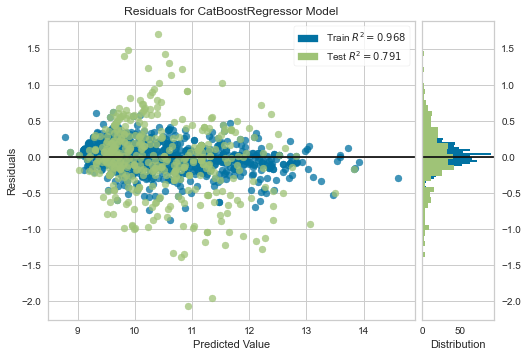

In [79]:
plot_model(tuned_cat)

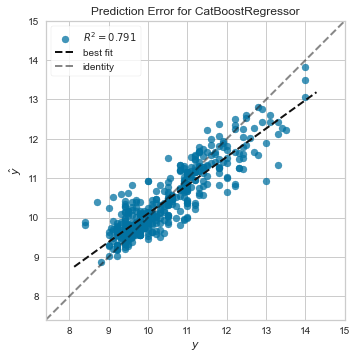

In [80]:
plot_model(tuned_cat, plot = 'error')

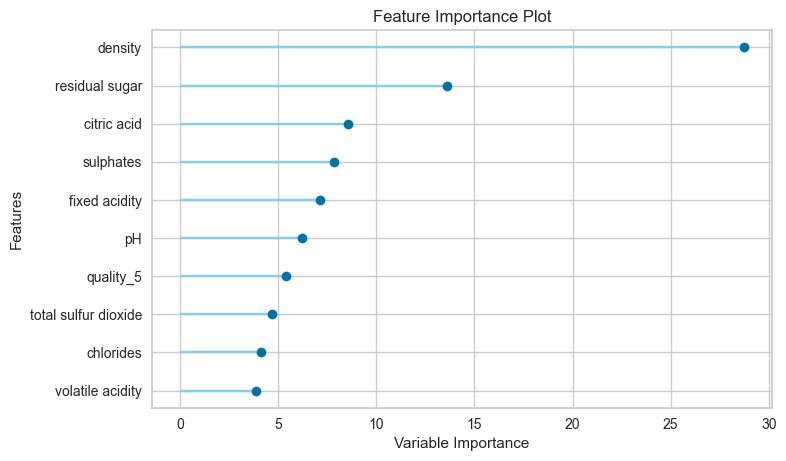

In [81]:
plot_model(tuned_cat, plot='feature')

## LGBM (Plot)

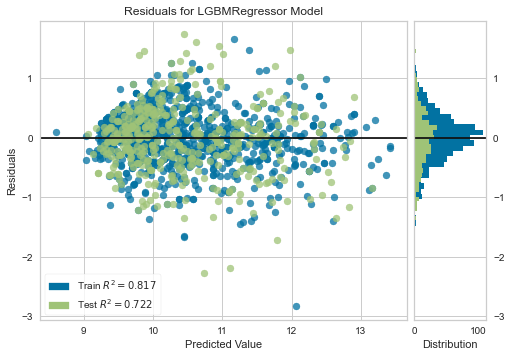

In [82]:
plot_model(tuned_lgbm)

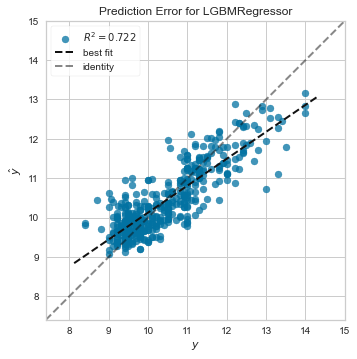

In [83]:
plot_model(tuned_lgbm, plot="error")

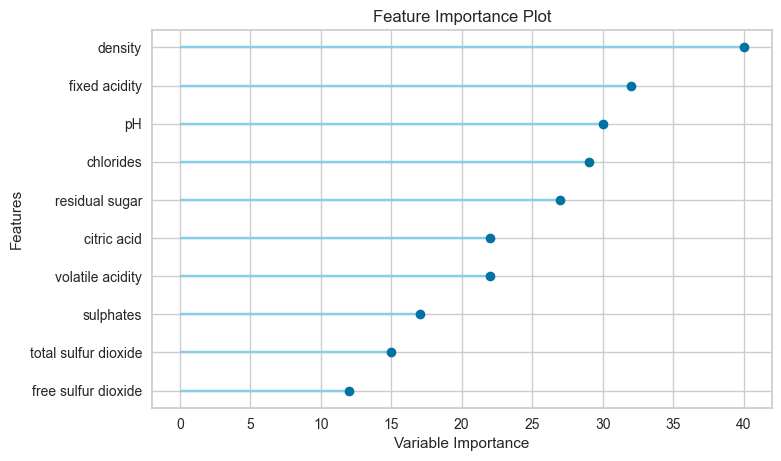

In [84]:
plot_model(tuned_lgbm, plot='feature')

## XGB (Plot)

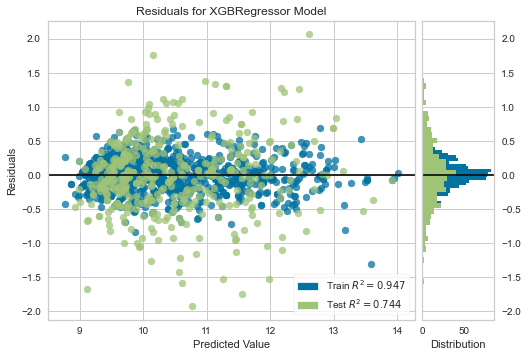

In [85]:
plot_model(tuned_xgb)

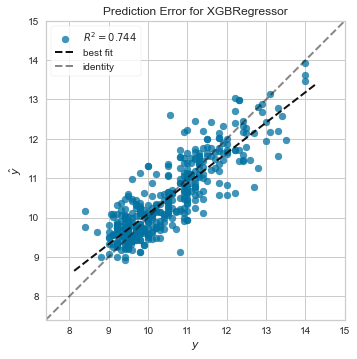

In [86]:
plot_model(tuned_xgb, plot="error")

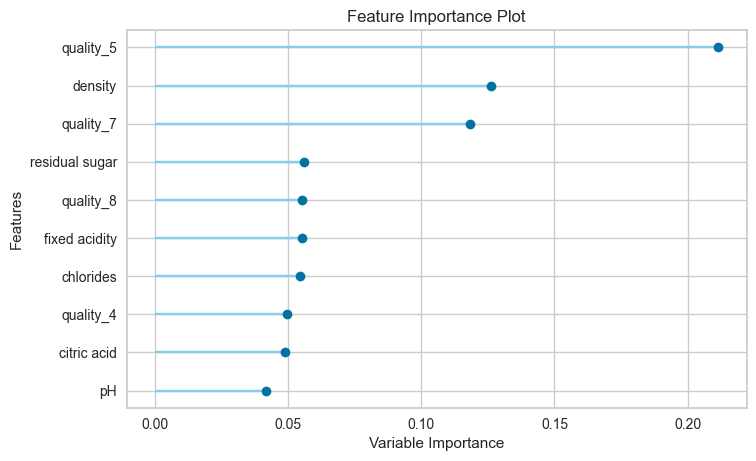

In [87]:
plot_model(tuned_xgb, plot="feature")

# Evaluate the Models

## Tuned Cat

In [88]:
evaluate_model(tuned_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [89]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3564,0.2430,0.4929,0.7905,0.0423,0.0338


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,9.663060
1,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,9.976289
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.641825
3,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.744605
4,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,10.006866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.296584
428,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.428210
429,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.272369
430,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,10.122876


## Tuned LGBM

In [90]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [91]:
predict_model(tuned_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4289,0.3227,0.5680,0.7218,0.0490,0.0410


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,9.628858
1,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,10.121698
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.897549
3,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.630643
4,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,9.848789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.223097
428,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.805578
429,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.250506
430,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,10.052805


## Tuned XGB

In [92]:
evaluate_model(tuned_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [93]:
predict_model(tuned_xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.4053,0.2970,0.5450,0.7439,0.0468,0.0387


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,10.025812
1,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,9.677003
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.819518
3,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,10.146936
4,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,9.939849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.755025
428,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.553188
429,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.351548
430,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,9.775377


# Finalize Models

## Cat Boost

In [94]:
final_cat = finalize_model(tuned_cat)

In [95]:
print(final_cat)

In [96]:
predict_model(final_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1413,0.0351,0.1872,0.9698,0.0165,0.0136


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,9.465524
1,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,9.542549
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.545533
3,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.808046
4,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,10.392572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.420501
428,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.332102
429,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.707160
430,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,10.135544


In [97]:
unseen_predictions = predict_model(final_cat, data= data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.430290
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.456661
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.562562
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.196356
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.594094


In [98]:
from pycaret.utils import check_metric

check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'RMSE')

0.4432

## LGBM

In [99]:
final_lgbm = finalize_model(tuned_lgbm)

In [100]:
print(final_lgbm)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
              n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
              random_state=1, reg_alpha=0.005, reg_lambda=4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [101]:
predict_model(final_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3232,0.1856,0.4308,0.8400,0.0370,0.0308


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,9.591878
1,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,9.809749
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.554986
3,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.623765
4,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,9.982410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.395743
428,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.633650
429,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.130479
430,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,9.981148


In [102]:
unseen_predictions = predict_model(final_lgbm, data= data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.372180
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.339579
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.258719
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,8.892817
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.484373


In [103]:
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'RMSE')

0.5289

## XGB

In [104]:
final_xgb = finalize_model(tuned_xgb)

In [105]:
print(final_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=1, reg_alpha=0.2, reg_lambda=0.001,
             scale_pos_weight=1.6, subsample=0.2, tree_method='auto',
             validate_parameters=1, verbosity=0)


In [106]:
predict_model(final_xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.1872,0.0602,0.2453,0.9481,0.0215,0.0180


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,9.367711
1,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,9.919836
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.571567
3,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.951090
4,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,10.460743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.407411
428,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.207344
429,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.699273
430,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,10.091608


In [107]:
unseen_predictions = predict_model(final_xgb, data= data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.519204
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.503886
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.194921
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.055351
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.787461


In [108]:
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'RMSE')


0.4939

# Results

### The final results leave the Catboost Regressor as the one with the most accurate score on the test data with an RMSE score of 0.4432.
### The LGBM regressor with the highest RMSE score of 0.5289.
### The XGB regressor with the second best RMSE score of 0.4939.

### As the Catboost Regressor has the lowest RMSE score I want to tune it further.

According to the feature plot model of the cat booster the following attributes do not matter as much:
 - Volatile Acidity
 - Total Sulpher Dioxide
 - Chlorides
 
Lets see the results when I drop all 3.

In [109]:
wineData = pd.read_csv("winequality-red.csv", sep= ";")

print(wineData.shape)

wineData.columns = wineData.columns.str.replace(" ", "_")

wineData = wineData.drop(columns=["volatile_acidity","chlorides","total_sulfur_dioxide"])

wineData


(1599, 12)


,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,32.0,0.99547,3.57,0.71,10.2,5


In [110]:
dataSample = wineData.sample(frac=0.9, random_state = 786)
data_unseen = wineData.drop(dataSample.index)

dataSample.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print("Data for Modeling: " + str(dataSample.shape))
print("Unseen Data for Predictions: " + str(data_unseen.shape))

Data for Modeling: (1439, 9)
Unseen Data for Predictions: (160, 9)


In [111]:
wine_regression = setup(data=dataSample, target = 'alcohol', session_id=1)

,Description,Value
0,session_id,1
1,Target,alcohol
2,Original Data,"(1439, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1007, 13)"


In [112]:
best = compare_models(exclude = ['ransac'], sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3697,0.2723,0.5197,0.7537,0.0445,0.0353,0.2400
lightgbm,Light Gradient Boosting Machine,0.3837,0.2910,0.5371,0.7365,0.0461,0.0366,0.0300
rf,Random Forest Regressor,0.3947,0.3035,0.5485,0.7246,0.0470,0.0376,0.0400
xgboost,Extreme Gradient Boosting,0.3752,0.3058,0.5500,0.7227,0.0472,0.0358,0.0320
gbr,Gradient Boosting Regressor,0.4124,0.3055,0.5502,0.7229,0.0472,0.0393,0.0120
et,Extra Trees Regressor,0.3812,0.3106,0.5558,0.7159,0.0475,0.0362,0.0290
lr,Linear Regression,0.4713,0.3774,0.6111,0.6542,0.0528,0.0450,0.0030
lar,Least Angle Regression,0.4713,0.3774,0.6111,0.6542,0.0528,0.0450,0.0030
ada,AdaBoost Regressor,0.5552,0.4722,0.6861,0.5700,0.0592,0.0536,0.0110
dt,Decision Tree Regressor,0.5136,0.5853,0.7610,0.4574,0.0655,0.0491,0.0030


It appears that the RMSE score is higher when running the initial setup

In [113]:
new_cat = create_model('catboost')

print(new_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3404,0.2258,0.4752,0.8040,0.0409,0.0328
1,0.3483,0.3600,0.6000,0.7017,0.0478,0.0317
2,0.3746,0.2459,0.4959,0.7816,0.0428,0.0357
3,0.3928,0.2713,0.5209,0.7613,0.0442,0.0370
4,0.3707,0.2555,0.5055,0.7751,0.0439,0.0355
5,0.4226,0.3551,0.5959,0.7232,0.0514,0.0402
6,0.3784,0.2311,0.4807,0.7209,0.0424,0.0371
7,0.3888,0.3244,0.5696,0.7551,0.0487,0.0370
8,0.3539,0.2216,0.4708,0.7547,0.0415,0.0345
9,0.3270,0.2327,0.4823,0.7598,0.0415,0.0312


In [114]:
tuned_new_cat = tune_model(new_cat, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3623,0.2352,0.4850,0.7959,0.0418,0.0348
1,0.3598,0.3604,0.6004,0.7013,0.0477,0.0325
2,0.3779,0.2519,0.5019,0.7762,0.0435,0.0360
3,0.4124,0.3025,0.5500,0.7340,0.0463,0.0386
4,0.3608,0.2516,0.5016,0.7785,0.0436,0.0346
5,0.4308,0.3798,0.6163,0.7039,0.0528,0.0408
6,0.3991,0.2489,0.4989,0.6993,0.0438,0.0391
7,0.3966,0.3358,0.5794,0.7465,0.0492,0.0373
8,0.3748,0.2352,0.4849,0.7397,0.0427,0.0366
9,0.3117,0.2097,0.4579,0.7836,0.0392,0.0295


In [115]:
evaluate_model(tuned_new_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [116]:
final_new_cat = finalize_model(tuned_new_cat)

In [117]:
predict_model(final_new_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1643,0.0476,0.2183,0.9589,0.0192,0.0158


,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.22,2.2,11.0,0.99670,3.36,0.55,0.0,0.0,1.0,0.0,0.0,0.0,9.1,9.664961
1,7.5,0.18,7.0,27.0,0.99915,3.38,0.77,0.0,0.0,1.0,0.0,0.0,0.0,9.4,9.652935
2,12.3,0.49,2.2,5.0,1.00020,3.19,0.44,0.0,0.0,1.0,0.0,0.0,0.0,9.6,9.523145
3,7.1,0.01,2.5,20.0,0.99746,3.55,0.59,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.717927
4,8.4,0.08,2.1,16.0,0.99580,3.13,0.52,0.0,0.0,1.0,0.0,0.0,0.0,11.0,10.433696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.6,0.00,2.2,50.0,0.99544,3.59,0.68,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.368109
428,7.7,0.49,1.8,20.0,0.99680,3.21,0.71,0.0,0.0,1.0,0.0,0.0,0.0,9.3,9.419135
429,10.3,0.56,1.4,3.0,0.99471,3.16,0.51,0.0,0.0,0.0,1.0,0.0,0.0,11.8,11.702455
430,6.7,0.07,2.4,17.0,0.99580,3.35,0.54,0.0,0.0,1.0,0.0,0.0,0.0,10.1,10.149060


In [118]:
unseen_predictions = predict_model(final_new_cat, data= data_unseen)
unseen_predictions.head()

,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.00,1.8,13.0,0.9978,3.51,0.56,9.4,5,9.494325
1,7.3,0.00,1.2,15.0,0.9946,3.39,0.47,10.0,7,10.349953
2,7.8,0.29,1.6,9.0,0.9974,3.26,1.56,9.1,5,9.488906
3,8.1,0.28,1.7,16.0,0.9968,3.11,1.28,9.3,5,9.341612
4,8.3,0.12,2.3,15.0,0.9966,3.17,0.66,9.8,5,9.789902


In [119]:
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'RMSE')



0.4662

The Results of removing the bottom 3 features from the feature importance plot resulted in a 0.0230 increase in the RMSE score lowering the precision by a decent amount.

However there are a decent amount of columns added to the table with the quality column being broken into multiple categories and a lot of them were not even on the feature plot.
Lets investigate there.

In [120]:
wineData = pd.read_csv("winequality-red.csv", sep= ";")

print(wineData.shape)

wineData.columns = wineData.columns.str.replace(" ", "_")

wineData = wineData.drop(columns=["quality"])

wineData

(1599, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [121]:
dataSample = wineData.sample(frac=0.9, random_state = 786)
data_unseen = wineData.drop(dataSample.index)

dataSample.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print("Data for Modeling: " + str(dataSample.shape))
print("Unseen Data for Predictions: " + str(data_unseen.shape))

Data for Modeling: (1439, 11)
Unseen Data for Predictions: (160, 11)


In [122]:
wine_regression = setup(data=dataSample, target = 'alcohol', session_id=1)

,Description,Value
0,session_id,1
1,Target,alcohol
2,Original Data,"(1439, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1007, 10)"


In [123]:
best = compare_models(exclude = ['ransac'], sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3657,0.2784,0.5250,0.7491,0.0448,0.0348,0.2950
lightgbm,Light Gradient Boosting Machine,0.3747,0.2952,0.5402,0.7337,0.0462,0.0356,0.0430
et,Extra Trees Regressor,0.3692,0.2988,0.5449,0.7290,0.0465,0.0351,0.0340
gbr,Gradient Boosting Regressor,0.4095,0.3004,0.5463,0.7270,0.0468,0.0391,0.0150
xgboost,Extreme Gradient Boosting,0.3722,0.3082,0.5517,0.7211,0.0473,0.0355,0.0520
rf,Random Forest Regressor,0.3970,0.3074,0.5528,0.7209,0.0473,0.0378,0.0460
lr,Linear Regression,0.4812,0.3928,0.6239,0.6409,0.0539,0.0460,0.0040
lar,Least Angle Regression,0.4812,0.3928,0.6239,0.6409,0.0539,0.0460,0.0030
br,Bayesian Ridge,0.4818,0.3927,0.6239,0.6409,0.0539,0.0460,0.0020
ada,AdaBoost Regressor,0.5704,0.5043,0.7093,0.5393,0.0612,0.0551,0.0120


A Marginal Increase of the RMSE and decrease of the R2 Score occurred.

# Final Results
Knowing the results of dropping the initial 3 least important features on the feature plot reduced the precision it is likely that majority of these features are required to maintain the accuracy of the model.